We are trying to see if there is a correlation between working on neurotech & my physio activity (oura)

In [1]:
import pandas as pd

# this is grouped activity watch data
aw_data = pd.read_csv("data/aw_data_grouped.csv")

# filter for neurotech events
import re

def is_neuro(text):
    if re.search('(neuro)|(eeg)|(brain)',text) != None:
        return 1
    return 0

aw_data["is_neurotech"] = aw_data["event_classification"].apply(lambda x: is_neuro(x))

# set duration second to zero if it is not neuro
aw_data["duration_seconds"] = aw_data[['is_neurotech','duration_seconds']].apply(lambda x: x['duration_seconds'] if x['is_neurotech'] == 1 else 0, axis=1)

# get data summarized by day
aw_data_neuro_grouped = aw_data.groupby(["summary_day"], as_index=False)
aw_data_neuro_grouped = aw_data_neuro_grouped.agg({
                            'is_neurotech': 'sum',
                            'duration_seconds': 'sum'
                        })
aw_data_neuro_grouped.rename(columns = {'is_neurotech':'activity_frequency', 'duration_seconds':'activity_duration'}, inplace = True)
aw_data_neuro_grouped

,summary_day,activity_frequency,activity_duration
0,2021-02-27,4,60.327
1,2021-02-28,3,2775.748
2,2021-03-01,4,3952.435
3,2021-03-02,2,392.237
4,2021-03-03,1,15.462
5,2021-03-04,0,0.000
6,2021-03-05,0,0.000
7,2021-03-06,2,771.974
8,2021-03-07,3,541.685
9,2021-03-08,2,59.005


In [84]:
oura_data = pd.read_csv("data/oura_cleaned.csv")

print(oura_data.columns)

# sleeptime should be converted into a numeric representation 
# - (unixTimestamp), rest_minutes
# heartrate - hr_average_act_1, hr_lowest_act_1, score_hrv_balance, score_resting_hr, hr_5min, hr_average_res_1, hr_lowest_res_1
# activity - score_activity_balance, score_hrv_balance, score_resting_hr, score_sleep_balance, score_recovery_index

Index(['Unnamed: 0', 'average_met', 'cal_active', 'cal_total_kcal',
       'class_5min', 'daily_movement', 'day_end', 'day_start', 'high_minutes',
       'inactive_minutes', 'inactivity_alerts', 'low_minutes',
       'medium_minutes', 'met_1min', 'met_min_high', 'met_min_inactive',
       'met_min_low', 'met_min_medium', 'non_wear_minutes', 'rest_minutes',
       'rest_mode_state_act_1', 'score_act_1', 'score_meet_daily_targets',
       'score_move_every_hour', 'score_recovery_time', 'score_stay_active',
       'score_training_frequency', 'score_training_volume', 'steps',
       'summary_date_act', 'target_calories', 'target_km', 'target_miles',
       'timezone_act', 'to_target_km', 'to_target_miles', 'total_act_1',
       'bedtime_end_act_1', 'bedtime_start_act_1', 'breath_average_act_1',
       'duration_act_1', 'period_id_act_1', 'summary_date_res', 'timezone_res',
       'hr_average_act_1', 'hr_lowest_act_1', 'rmssd_act_1', 'period_id_res_1',
       'rest_mode_state_res_1', 'score

In [3]:
# create combined dataset for correlation
# data column here is - summary_day
aw_for_correlation = aw_data_neuro_grouped.iloc[:-1]
aw_for_correlation.set_index('summary_day')

# date column here is - summary_date_act (could be different we have like 4 candidates in this dataset)
oura_data_for_correlation = oura_data.iloc[38:, ]
oura_data_for_correlation.rename(columns = {'summary_date_act':'summary_day'}, inplace = True)
oura_data_for_correlation.set_index("summary_day")


combined_dataset = aw_for_correlation.merge(oura_data_for_correlation, on="summary_day", how="left")
combined_dataset

c:\users\oreog\miniconda3\envs\fusion\lib\site-packages\pandas\core\frame.py:4298: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,summary_day,activity_frequency,activity_duration,Unnamed: 0,average_met,cal_active,cal_total_kcal,class_5min,daily_movement,day_end,...,score_efficiency,score_latency,score_rem,score_total,summary_date_res_1,temperature_delta_celsius,temperature_deviation,timezone,total_res_1,temperature_trend_deviation
0,2021-02-27,4,60.327,38.0,1.31250,190.0,2267.0,2222323211222322233222233332222222222222233332...,3288.0,2021-02-28T03:59:59-08:00,...,74.0,75.0,9.0,43.0,2021-03-05,-0.03,-0.03,-480.0,18090.0,0.15
1,2021-02-28,3,2775.748,39.0,1.28125,230.0,2264.0,1111111111111111122200000000000000000343223222...,4015.0,2021-03-01T03:59:59-08:00,...,88.0,91.0,8.0,27.0,2021-03-06,-0.01,-0.01,-480.0,14040.0,0.07
2,2021-03-01,4,3952.435,40.0,1.43750,422.0,2524.0,1111111111112122222243533423433332222233332333...,7605.0,2021-03-02T03:59:59-08:00,...,93.0,67.0,41.0,41.0,2021-03-08,-0.16,-0.16,-480.0,17640.0,0.25
3,2021-03-02,2,392.237,41.0,1.31250,182.0,2251.0,1111111121111111122111222222221221112223333232...,3317.0,2021-03-03T03:59:59-08:00,...,98.0,67.0,25.0,51.0,2021-03-09,-0.02,-0.02,-480.0,20340.0,0.13
4,2021-03-03,1,15.462,42.0,1.50000,444.0,2574.0,1111111211111222122343331044444333222222222222...,8062.0,2021-03-04T03:59:59-08:00,...,96.0,89.0,12.0,28.0,2021-03-10,-0.32,-0.32,-480.0,14130.0,-0.08
5,2021-03-04,0,0.000,43.0,1.46875,394.0,2535.0,1111111111111111222222223321233233332333333332...,7165.0,2021-03-05T03:59:59-08:00,...,81.0,94.0,96.0,98.0,2021-03-11,0.13,0.13,-480.0,32730.0,0.00
6,2021-03-05,0,0.000,44.0,1.59375,572.0,2725.0,1211111121111223335422333433333222222222222222...,10355.0,2021-03-06T03:59:59-08:00,...,74.0,91.0,33.0,44.0,2021-03-12,0.16,0.16,-480.0,18480.0,0.13
7,2021-03-06,2,771.974,45.0,1.15625,68.0,2021.0,1111111111111111123111111111111111111111222223...,1200.0,2021-03-07T03:59:59-08:00,...,88.0,75.0,42.0,71.0,2021-03-13,0.31,0.31,-480.0,25500.0,0.30
8,2021-03-07,3,541.685,46.0,1.34375,307.0,2319.0,0000000000000000000000000000000000000000000000...,5650.0,2021-03-08T03:59:59-08:00,...,88.0,94.0,62.0,65.0,2021-03-14,-0.12,-0.12,-480.0,23850.0,0.20
9,2021-03-08,2,59.005,47.0,1.53125,484.0,2634.0,1111111111111111122221222221232233344233322222...,8660.0,2021-03-09T03:59:59-08:00,...,41.0,78.0,19.0,39.0,2021-03-15,0.21,0.21,-420.0,16950.0,0.19


In [87]:
combined_dataset_2 = combined_dataset[["activity_frequency", "activity_duration", "bedtime_end_delta", "deep_seconds", "hr_average_act_1", "hr_lowest_act_1", "score_hrv_balance", "score_resting_hr", "hr_average_res_1", "hr_lowest_res_1" ]]

# heartrate - hr_average_act_1, hr_lowest_act_1, score_hrv_balance, score_resting_hr, hr_5min, hr_average_res_1, hr_lowest_res_1
# activity - score_activity_balance, score_hrv_balance, score_resting_hr, score_sleep_balance, score_recovery_index

# combined_dataset_2 = combined_dataset_2.apply (pd.to_numeric, errors='coerce')
# combined_dataset_2 = combined_dataset_2.dropna()



combined_dataset_2

,activity_frequency,activity_duration,bedtime_end_delta,deep_seconds,hr_average_act_1,hr_lowest_act_1,score_hrv_balance,score_resting_hr,hr_average_res_1,hr_lowest_res_1
0,4,60.327,18139.0,7860.0,81.90,78.0,92.0,100.0,60.09,55.0
1,3,2775.748,27037.0,9840.0,71.00,71.0,91.0,78.0,56.70,53.0
2,4,3952.435,19801.0,7380.0,72.50,72.0,88.0,46.0,53.67,50.0
3,2,392.237,19923.0,8040.0,66.00,66.0,88.0,95.0,64.29,56.0
4,1,15.462,17403.0,9180.0,59.00,58.0,86.0,95.0,51.08,49.0
5,0,0.000,26942.0,11100.0,63.75,61.0,85.0,55.0,55.14,51.0
6,0,0.000,28379.0,6720.0,54.39,52.0,84.0,100.0,64.29,56.0
7,2,771.974,20401.0,12450.0,66.00,64.0,84.0,87.0,61.69,55.0
8,3,541.685,21904.0,8040.0,55.00,55.0,87.0,100.0,66.75,59.0
9,2,59.005,22502.0,6570.0,70.62,67.0,87.0,62.0,62.14,56.0


In [77]:
import numpy as np

activity_duration = combined_dataset_2["activity_duration"].to_numpy()


bedtime_end_delta = combined_dataset_2['bedtime_end_delta'].to_numpy()

print(activity_duration)
print(bedtime_end_delta)

[6.0327000e+01 2.7757480e+03 3.9524350e+03 3.9223700e+02 1.5462000e+01
 0.0000000e+00 0.0000000e+00 7.7197400e+02 5.4168500e+02 5.9005000e+01
 2.9987970e+03 1.9639400e+02 1.3646320e+03 4.4556080e+03 1.7739969e+04
 1.2196621e+04 9.3349330e+03 5.1431800e+02 4.9938860e+03 1.0453470e+03
 3.5482890e+03 1.4106885e+04 1.6892860e+03 4.8689390e+03 8.6278000e+01
 1.1587770e+03 0.0000000e+00 0.0000000e+00 4.0346000e+01 9.4262000e+01
 3.1351400e+03 6.3470800e+02 9.8705000e+01 0.0000000e+00 1.5636350e+03
 1.2599900e+02]
[18139. 27037. 19801. 19923. 17403. 26942. 28379. 20401. 21904. 22502.
 23821. 25439. 22810. 21902. 35102. 30542. 22980.  7743. 22081. 22471.
 21214. 20552. 23491. 15990. 23372. 30692. 25231. 19894. 19653. 23730.
 19773. 19985. 26131. 22144. 26851. 14911.]


activity_duration: mean=2626.684 stdv=4202.716
bedtime_end_delta: mean=22526.000 stdv=4816.578


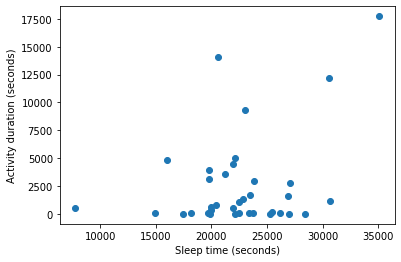

Covariance [[23862268.91428571  7384115.85794286]
 [ 7384115.85794286 18167471.21017661]]

Pearsons correlation: 0.3546462680128182

Spearmans correlation: 0.07500006227422996



In [79]:
# generate related variables
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot


# summarize
print('activity_duration: mean=%.3f stdv=%.3f' % (mean(activity_duration), std(activity_duration)))
print('bedtime_end_delta: mean=%.3f stdv=%.3f' % (mean(bedtime_end_delta), std(bedtime_end_delta)))
# plot

pyplot.scatter(bedtime_end_delta, activity_duration)
# pyplot.ylim([10, 6000])
pyplot.ylabel("Activity duration (seconds)")
pyplot.xlabel("Sleep time (seconds)")
pyplot.show()


# todo (visualization to explain suggestion):
# plot across frequency & duration 
# standardize to a scale

# covariance
from numpy import cov

covariance = cov(bedtime_end_delta, activity_duration)
print(f"Covariance {covariance}\n")


# pearson correlation - strength of the linear relationship between two data samples.
from scipy.stats import pearsonr
# calculate Pearsons correlation
corr, _ = pearsonr(bedtime_end_delta, activity_duration)
print(f"Pearsons correlation: {corr}\n")

# spearmans correlation - 
from scipy.stats import spearmanr
# calculate spearman's correlation
corr, _ = spearmanr(bedtime_end_delta, activity_duration)
print(f'Spearmans correlation: {corr}\n')

In [88]:
# do correlation on the whole pandas dataset
combined_dataset_2.corr(method="pearson")

,activity_frequency,activity_duration,bedtime_end_delta,deep_seconds,hr_average_act_1,hr_lowest_act_1,score_hrv_balance,score_resting_hr,hr_average_res_1,hr_lowest_res_1
activity_frequency,1.000000,0.566871,0.353607,0.010925,0.318408,0.255258,-0.128195,-0.125899,-0.089668,-0.054993
activity_duration,0.566871,1.000000,0.354646,-0.150451,0.219905,0.226387,-0.048945,-0.181196,-0.300528,-0.219820
bedtime_end_delta,0.353607,0.354646,1.000000,0.026894,-0.303423,-0.320024,0.004202,-0.116597,0.046453,0.109235
deep_seconds,0.010925,-0.150451,0.026894,1.000000,-0.125663,-0.111415,-0.007369,0.103472,-0.340194,-0.211852
hr_average_act_1,0.318408,0.219905,-0.303423,-0.125663,1.000000,0.979383,0.658091,-0.336362,-0.191356,-0.189500
hr_lowest_act_1,0.255258,0.226387,-0.320024,-0.111415,0.979383,1.000000,0.697557,-0.311823,-0.191120,-0.155250
score_hrv_balance,-0.128195,-0.048945,0.004202,-0.007369,0.658091,0.697557,1.000000,0.465540,0.126971,-0.028115
score_resting_hr,-0.125899,-0.181196,-0.116597,0.103472,-0.336362,-0.311823,0.465540,1.000000,0.180009,0.179848
hr_average_res_1,-0.089668,-0.300528,0.046453,-0.340194,-0.191356,-0.191120,0.126971,0.180009,1.000000,0.851277
hr_lowest_res_1,-0.054993,-0.219820,0.109235,-0.211852,-0.189500,-0.155250,-0.028115,0.179848,0.851277,1.000000


In [89]:
# do correlation on the whole pandas dataset
combined_dataset_2.corr(method="spearman")

,activity_frequency,activity_duration,bedtime_end_delta,deep_seconds,hr_average_act_1,hr_lowest_act_1,score_hrv_balance,score_resting_hr,hr_average_res_1,hr_lowest_res_1
activity_frequency,1.000000,0.796254,0.143788,0.022276,0.581180,0.515218,-0.085066,-0.114280,-0.098275,-0.101922
activity_duration,0.796254,1.000000,0.075000,0.007862,0.459649,0.385965,-0.136142,-0.129906,-0.263419,-0.265633
bedtime_end_delta,0.143788,0.075000,1.000000,0.148806,-0.234676,-0.231174,-0.132455,-0.059345,0.011455,0.116971
deep_seconds,0.022276,0.007862,0.148806,1.000000,-0.300000,-0.287719,-0.054185,0.193329,-0.362191,-0.204124
hr_average_act_1,0.581180,0.459649,-0.234676,-0.300000,1.000000,0.989474,0.595778,-0.358666,-0.247368,-0.182634
hr_lowest_act_1,0.515218,0.385965,-0.231174,-0.287719,0.989474,1.000000,0.613510,-0.385169,-0.270175,-0.157810
score_hrv_balance,-0.085066,-0.136142,-0.132455,-0.054185,0.595778,0.613510,1.000000,0.372446,0.244060,0.163319
score_resting_hr,-0.114280,-0.129906,-0.059345,0.193329,-0.358666,-0.385169,0.372446,1.000000,0.151346,0.141584
hr_average_res_1,-0.098275,-0.263419,0.011455,-0.362191,-0.247368,-0.270175,0.244060,0.151346,1.000000,0.837766
hr_lowest_res_1,-0.101922,-0.265633,0.116971,-0.204124,-0.182634,-0.157810,0.163319,0.141584,0.837766,1.000000


In [ ]:
# todo: use heatmap to visualize correlations

# add more data sources to correlation